## RAMA 2: Vamos a estudiar el hamiltoniano asociado a una cadena de moléculas sin interacción dipolar. 

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sympy as sp
from qutip import *
from qutip import (about, destroy, entropy_vn, expect, hinton, jmat, ptrace, qeye, steadystate, tensor, wigner)
from mpl_toolkits.mplot3d import Axes3D # hacer gráfico 3Dfrom numpy import *
%matplotlib inline
from numpy import *
from scipy.misc import *
from scipy.special import *


In [27]:
from sympy import *

r, k=symbols('r, k')

def j1(r):
    return sin(r)/(r**2)+cos(r)/r

def j2(r):
    return (3/r**3-1/r)*sin(r)-3*(cos(r)/r**2)


def j0(r):
    return sin(r)/r

def tau(n, r):
    return jn(n, r)

def h(n, t):
    return jn(n,r)+1j*yn(n,r)

def Ptau(n, r):
    return 1/r*diff(r*jn(n,r), r, 1)

def Ph(n, r):
    return 1/r*diff(r*h(n,r), r, 1)

#display(h)
#latex(diff(j, r))

In [25]:
display(diff(j1(r), r, 1))

-sin(r)/r - 2*sin(r)/r**3

In [7]:
diff(h(1, r),r, 1 )

1.0*I*(yn(0, r) - 2*yn(1, r)/r) + jn(0, r) - 2*jn(1, r)/r

In [1]:
k=[1,2]

In [28]:
##### para los coeficientes

def tau(n,i,l):
    r=k[i]*a[l]
    return spherical_jn(n,r)

def h(n,i,l):
    r=k[i]*a[l]
    return spherical_jn(n,r) + 1j * spherical_yn(n,r)


def Ptau(n,i,l):
    return (n*tau(n-1,i,l)-(n+1)*tau(n+1, i, l))/(2*n+1)+tau(n, i, l)/(k[i]*a[l])

def Ph(n, i, l):
    return (n*h(n-1,i,l)-(n+1)*h(n+1, i, l))/(2*n+1)+h(n, i, l)/(k[i]*a[l])
 
def T(n, B):

    f=0
            
    if B=='H':
        return  ( k[f+1]*(Ptau(n, f+1,f)*h(n, f+1, f)-tau(n, f+1, f)*Ph(n, f+1, f)) )/( k[f+1]*Ptau(n, f+1,f)*h(n, f, f)- k[f]*tau(n, f+1, f)*Ph(n, f, f))
        
    if B=='V':
        return  ( k[f+1]*(tau(n, f+1,f)*Ph(n, f+1, f)-Ptau(n, f+1, f)*h(n, f+1, f)) )/( k[f+1]*tau(n, f+1,f)*Ph(n, f, f)- k[f]*Ptau(n, f+1, f)*h(n, f, f))

        

def AM(n):
    return T(n, 'H')

def AN(n):
    return T(n, 'V')

##################################

def Plpmv(n,m,theta):

    return ((n*np.cos(theta)*lpmv(n, m, np.cos(theta))-(n+m)*lpmv(n-1,m, np.cos(theta)))/np.sqrt((1-np.cos(theta)**2)) )


def M(A,B,m, n, k, R): #(e,o), (p, np) 

    result=[0] #no tenemos componente radial
    r=R[0]
    theta=R[1]
    phi=R[2]

    hn=spherical_jn(n,k*r) +1j*spherical_yn(n,k*r)

    if A=='e':
    
        if B=='p':
            result.append( -m/(np.sin(theta))*(hn)*lpmv(m, n, np.cos(theta))*np.sin(m*phi) )
            result.append( -hn*Plpmv(n,m,theta) *np.cos(m*phi)  )
        else:
            result.append( -m/(np.sin(theta))*(spherical_jn(n, k*r))*lpmv(m, n, np.cos(theta))*np.sin(m*phi))
            result.append( -spherical_jn(n, k*r)*Plpmv(n,m,theta) *np.cos(m*phi)  )

    if A=='o':

        if B=='p':
            result.append( m/(np.sin(theta))*(hn)*lpmv(m, n, np.cos(theta))*np.cos(m*phi) )
            result.append( -hn*Plpmv(n,m,theta) *np.sin(m*phi)  )
        else:
            result.append( m/(np.sin(theta))*(spherical_jn(n, k*r))*lpmv(m, n, np.cos(theta))*np.cos(m*phi))
            result.append( -spherical_jn(n, k*r)*Plpmv(n,m,theta)*np.sin(m*phi) )

    return result




def Pj(n, rho):
    return (n*spherical_jn(n-1, rho)-(n+1)*spherical_jn(n+1,rho))/(2*n+1)

def Ph2(n, rho):
    return 



jn=spherical_jn(n, k*r)
hn=jn +1j*spherical_yn(n,k*r)
h=spherical_jn(n-1,k*r) +1j*spherical_yn(n-1,k*r)

def N(A,B,m, n, k, R): #(e,o), (p, np) 

    result=[] 
    r=R[0]
    theta=R[1]
    phi=R[2]

    if A=='e':
    
        if B=='p':
            result.append( n*(n+1)/(k*r)*hn*lpmv(m, n, np.cos(theta))*np.cos(m*phi) )

            result.append( ( Ph(n, k*r)+h/k*r  )*Plpmv(n,m,theta) *np.cos(m*phi)  )

            result.append(-( Ph(n, k*r)+h/k*r  )*(m/np.sin(theta))*lpmv(m, n, np.cos(theta))*np.sin(m*phi)) 
        else:
            result.append( n*(n+1)/(k*r)*jn*lpmv(m, n, np.cos(theta))*np.cos(m*phi) )

            result.append( ( Ph(n, k*r)+h(n,k*r)/k*r  )*Plpmv(n,m,theta) *np.cos(m*phi)  )

            result.append(-( Ph(n, k*r)+h(n,k*r)/k*r  )*(m/np.sin(theta))*lpmv(m, n, np.cos(theta))*np.sin(m*phi)) 

    if A=='o':

        if B=='p':
            result.append( n*(n+1)/(k*r)*hn*lpmv(m, n, np.cos(theta))*np.sin(m*phi) )

            result.append( 1/k*h*Plpmv(n,m,theta) *np.sin(m*phi)  )

            result.append( 1/k*h*(m/np.sin(theta))*lpmv(m, n, np.cos(theta))*np.cos(m*phi)) 
        else:

            result.append( n*(n+1)/(k*r)*spherical_jn(n, k*r)*lpmv(m, n, np.cos(theta))*np.sin(m*phi) )

            result.append( 1/k*spherical_jn(n-1, k*r)*Plpmv(n,m,theta) *np.sin(m*phi) )

            result.append( 1/k*spherical_jn(n-1, k*r)*(m/np.sin(theta))*lpmv(m, n, np.cos(theta))*np.cos(m*phi)) 
    return result



def kro(i, j):
    return 1 if i == j else 0

In [41]:
def G():

    P=['e', 'o']

    for i in P:
        for n in range(0, 100): 
            for m in range (0, n): 
                return (1j*k[0])/(4*np.pi)*(2-kro(m,0))*((2*n+1)*np.math.factorial(n-m))/(n*(n+1)*np.math.factorial(n+m)*( DM(n)*np.tensordot(M(i, 'np', m, n, k[1], ) )    )      )


array([[-0.2738519 +1.2564429j ,  0.98577482-0.63295874j,
         0.70807342-0.45464871j],
       [-0.54770381+2.5128858j ,  1.97154965-1.26591747j,
         1.41614684-0.90929743j],
       [-0.82155571+3.76932869j,  2.95732447-1.89887621j,
         2.12422025-1.36394614j]])

In [49]:
np.tensordot( np.array([1, 1, 1]),[1,2,3] , axes=0)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [18]:
import numpy as np

# Definir dos vectores de 3x1
vector1 = np.array([1,2,3])
vector2 = np.array([4,5,6])

# Calcular el producto tensorial
producto_tensorial = np.tensordot(vector1, vector2, axes=0)

# Imprimir el resultado
print("Producto tensorial:")
print(producto_tensorial)

Producto tensorial:
[[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]


# Acá inicia formalmente el código !!!

In [6]:
def a0(x): #esta función convierte una distancia x en metros a unidades atómicas a_0
    return x/(5.29177249e-11) 
#########

def tau(t): #convertir de segundos a tiempo en unidades atómicas
    return t/2.418884332268184938e-17

##################

def dby(d): #d está en debyes, pasamos a unidades atómocas ea_0
    return (d*0.393430307)


def fre(f): #se ingresa la frecuencia como energía en eV se convierte a hartrees. 
    
    return f/ 27.211386245988

In [8]:
#parámetros del sistema
L=1
K=0
M=(L-2)*K+2
print("{} dipolos ".format(M))
N=100

#parámetros de la nanoesfera

omega_p=fre(6.278) #se ingresa en eV, luego se transforma en Hartrees. 
R=a0(20e-9)  #este radio está asociado a la frecuencia de resonancia de la metilamina. 

#parámetros de las moléculas
omega_m=omega_p
epsilon_2=6.29

d=dby(1.811)  #el dipolo se ingresa en debyes

#paŕametros de la red

r=a0(6.27e-10)    # separación horizontal entre dipolos 

y=R+0.5*r   #distancia vertical entre el centro de la nano esfera y la línea en dónde están ubicados 
#los dipolos 

2 dipolos 


In [9]:
def posiciones (y, L, K):

    r=[[0,0,y]] #siembre habrá un dipolo en la parte superior de la esfera

    phi=np.linspace(0, np.pi, L)[1:-1]
    theta=np.linspace(0,2*np.pi, K+1)[:-1]

    for i in phi:
        for j in theta:
            X=y*np.sin(i)*np.cos(j)
            Y=y*np.sin(i)*np.sin(j)
            Z=y*np.cos(i)
            r.append([X,Y,Z])
       

    r.append([0,0,-y]) #siempre habrá un dipolo en la parte inferior de la esfera

    return np.array(r)


# Función para encontrar los vectores aleatorios que definen cada momento

In [10]:
def Momentos(M): #función que entrega un vector que en cada componente tiene las componentes x,y,z 
    #del vector unitario que determina cada dipolo en una red de N dipolos.
    
    momentos=[]
    
    for i in range (M):
        #ahora vamos a determinar las direcciones aleatorias theta y phi de cada dipolo
        np.random.seed()
        theta=np.random.uniform(0, np.pi)
        phi=np.random.uniform(0, 2*np.pi)

        x1=np.sin(theta)*np.cos(phi)
        y1=np.sin(theta)*np.sin(phi)
        z1=np.cos(theta)

        momentos.append([x1,y1,z1]) #vector que en cada componente tiene en ángulo theta y phi asociado 
    return (np.real(momentos))

In [11]:
momentos=Momentos(M)
P=posiciones(y, L, K)

In [12]:
fig, ax=plt.subplots(figsize=(15,15), subplot_kw=dict(projection='3d'))


#graficamos la nanoesfera
theta=np.linspace(0,np.pi,100)
phi=np.linspace(0,2*np.pi,100)

Theta,Phi=np.meshgrid(theta,phi)

X=R*np.sin(Theta)*np.cos(Phi) 
Y=R*np.sin(Theta)*np.sin(Phi)
Z=R*np.cos(Theta)

ax.plot_wireframe(X,Y,Z,lw=0.7, color='skyblue') #dibujamos el casquete esférico

#graficamos los dipolos y su dirección
for i in range (len(P)): #en P están los centros de masa de los momentos
    #en momentos está el vector del momento. 
    
    x1=momentos[i][0]+P[i][0]
    y1=momentos[i][1]+P[i][1]
    z1=momentos[i][2]+P[i][2]

    ax.plot((P[i][0],),(P[i][1],), (P[i][2],), marker='o',c='k') #dibujamos el centro del dipolo
    ax.plot((P[i][0], x1 ) ,(P[i][1],y1), (P[i][2],z1  ),  c='r') #dibujamos la línea
    ax.plot((x1,),(y1,),(z1,),'->',c='r') #dibujamos la dirección
    
 

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_ylabel('Z')
plt.show()

NameError: name 'plt' is not defined

# Función para determinar $\hat{\sigma}_+, \hat{\sigma}_-, \hat{\sigma}_3$ de cada dipolo

In [11]:
def sigmaT(M,N):
    l = 2  # number of levels per dipole
    Sigma = []
    for i in range(M):
        operators = []
        for j in range(M): #si el índice es igual a la matrix que quiero entonces pongo el destroy 
            #de resto pongo el qeye, luego al final pongo la matriz unitaria asociada a la radiación.
            if j != i:
                operators.append(qeye(l))
            else:
                operators.append(destroy(l))
        
        operators.append(qeye(N+1))
        sigma_plus=tensor(operators)
        Sigma.append(np.array(sigma_plus))

    return np.real(Sigma)

In [12]:
def Base(M,N):
    B=np.eye(2**M*(N+1))
    return np.linalg.eig(B)[1]

# 

\begin{align}
    \hat{H}_{dip}= \frac{\omega_m}{2} \sum_{j=1}^{M} \hat{\sigma}_{3j}
\end{align}

In [13]:
def Hdip0_(sigma):
    
    s=sigma.shape
    H_0=np.zeros((s))

    sp=sigma
    sm=np.transpose(sp)
    H_0+=sp@sm-sm@sp
        
    return (0.5*omega_m*H_0 )

In [14]:
def Hdip0(M, sigmas):
    
    s=sigmas[0].shape
    H_0=np.zeros((s))
    
    for i in range (M):
        sp=sigmas[i]
        sm=np.transpose(sp)
        H_0+=sp@sm-sm@sp
        
    return (0.5*omega_m*H_0 )


En los productos tensoriales que siguen primero se pone por convención la parte de materia y por último la parte de radiación. 

En la práctica el producto tensorial se hace en dirección inversa. 

In [15]:
def aT(M,N): #función que entrega la representación matricial del operador a en la base de 
    #N fotones y M dipolos. 
    L=[]
    for i in range(M):
        L.append(qeye(2))
    L.append(destroy(N+1))
    a=tensor(L) #el producto tensorial lo hace desde el último hasta el primero. 
    return (np.real(np.array(a)))

# hamiltoniano radiación-materia  en la base completa

### 

\begin{align} 
 \hat{H}_{tot}= \frac{\omega_m}{2} \sum_{i=1}^{  M } \hat{\sigma}_{3j}+\omega_p \hat{a}^{\dagger}\hat{a} + \frac{3}{2}d\sqrt{\frac{3 \omega_p R^3}{
  (2\epsilon_2+1)^{3/2}}} \left[\sum_{i=1}^{M}\sum_{\hat{k}=\hat{x}, \hat{y}, \hat{z}} \frac{ (3 \cos \theta_{0_ik} \cos \theta_{0_id_i}-\cos \theta_{d_ik}) }{r_{0d_i}^3}(\hat{\sigma}_{+i}+\hat{\sigma}_{-i}) \right ] (\hat{a}+\hat{a}^\dagger) 
\end{align}

In [16]:
def Hrad0(a):
    return omega_p*(np.transpose(a)@a+0.5*np.eye(a.shape[0]))

In [17]:
def HradI_(i, momento, sigma, P, a):
    
    K=np.array([[1,0,0], [0,1,0],[0,0,1]])
    
    H_rad1=np.zeros(sigma.shape)
    
    p= P/y
    m=momento
    sp=sigma
    sm=np.transpose(sp)
    
    anda=0
    
    for k in K:
        anda+=3*np.dot(p,k)*np.dot(p,m)-np.dot(m,k)
        

    landa=(3/2)*d*np.sqrt((3*omega_p*R**3)/(2*epsilon_2+1)**(3/2))*(1/y**3)*anda
    H_rad1+=landa*(sm+sp)
      
    return ( np.real( H_rad1@(a+np.transpose(a))), landa)

In [18]:
def HradI(M, momentos, sigmas, P, a, y):
 
    K=np.array([[1,0,0], [0,1,0],[0,0,1]])
    H_rad1=np.zeros((sigmas[0].shape))
    anda=[]
    for i in range(M):
        p= (1/y)*P[i]
        m=momentos[i]
        sp=sigmas[i]
        sm=np.transpose(sp)

        Landa=0

        for k in K:
            Landa+=3*np.dot(p,k)*np.dot(p,m)-np.dot(m,k)
      
        landa=(3/2)*d*np.sqrt((3*omega_p*R**3)/(2*epsilon_2+1)**(3/2))*(1/y**3)*Landa
        
        H_rad1+=np.real(landa*(sm+sp))

        anda.append(landa)

    return ( np.real( H_rad1@(a+np.transpose(a))), anda )

Vamos a definir una función que nos permita conocer para diferentes configuraciones de M dipolos entre qué valos varía el factor lamnda

In [15]:
def landa (M ,iter, P):
 
    K=np.array([[1,0,0], [0,1,0],[0,0,1]])
    anda=[]

    for j in range (iter):
        Landa=0
        momentos=Momentos(M)
        
        for i in range(M):
            p= (1/y)*P[i]
            m=momentos[i]


            for k in K:
                Landa+=3*np.dot(p,k)*np.dot(p,m)-np.dot(m,k)

        
        anda.append(3*d*np.sqrt((3*omega_p*R**3)/(2*epsilon_2+1)**(3/2))*(1/y**3)*Landa)

    return (np.max(anda))

In [21]:
#parámetros del sistema
L=10
K=15
M=(L-2)*K+2
print(M)
N=1000

#parámetros de la nanoesfera

omega_p=fre(6.278) #se ingresa en eV, luego se transforma en Hartrees. 
R=a0(20e-9)  #este radio está asociado a la frecuencia de resonancia de la metilamina. 

#parámetros de las moléculas
omega_m=omega_p
epsilon_2=6.29

d=dby(40)  #el dipolo se ingresa en debyes

#paŕametros de la red

r=a0(6.27e-10)    # separación horizontal entre dipolos 

y=R #distancia vertical entre el centro de la nano esfera y la línea en dónde están ubicados 
#los dipolos 


P=posiciones(y, L, K)
landa(M, 1000, P)

122


0.04519820589777689

In [ ]:
j = M/2.0
n = 2*j + 1

a  = tensor(destroy(N), qeye(n))
Jp = tensor(qeye(N), jmat(j, '+'))
Jm = tensor(qeye(N), jmat(j, '-'))
Jz = tensor(qeye(N), jmat(j, 'z'))

H0 = omega_p * a.dag() * a + omega_m * Jz
H1 = landa * (a + a.dag()) * (Jp + Jm)
H = H0 + g * H1

H

In [23]:
U0=Hdip0(M, sigmas)
U1=Hrad0(a)
U2=HradI(M, momentos, sigmas, P, a, y)[0]
U=U0+U1+U2
E=np.linalg.eigvals(U)

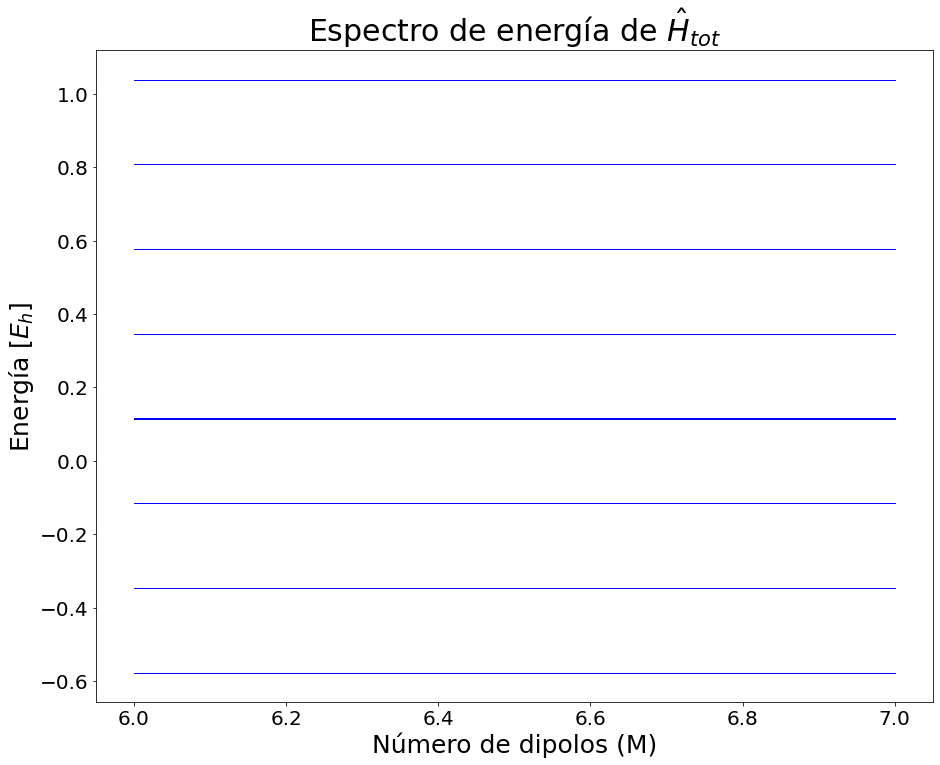

In [24]:
fig1,ax1=plt.subplots(1,1,figsize=(15,12))

for j in range(len(E)):
    y=E[j]
    X=[M, M+1]
    #X=[int(i), int(i+1)]
    ax1.plot(X,[y,y], c='blue', lw=1)
        
ax1.set_xlabel('Número de dipolos (M)', fontsize=25)
ax1.set_ylabel('Energía $[E_h]$', fontsize=25)
ax1.set_title('Espectro de energía de $\hat{H}_{tot}$', fontsize=30)


ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

In [42]:
#parámetros del sistema
L=4
K=4
M=(L-2)*K+2
print(M)
N=5

#parámetros de la nanoesfera

omega_p=fre(6.623) #se ingresa en eV, luego se transforma en Hartrees. 
R=a0(18e-9)  #este radio está asociado a la frecuencia de resonancia de la metilamina. 

#parámetros de las moléculas
omega_m=omega_p
epsilon_2=6.29

d=dby(1.869)  #el dipolo se ingresa en debyes

#paŕametros de la red

r=a0(6.27e-10)    # separación horizontal entre dipolos 

y=R+0.5*r    #distancia vertical entre el centro de la nano esfera y la línea en dónde están ubicados 
#los dipolos 

momentos=Momentos(M)
sigmas= sigmaT(M,N)
P=posiciones(y, L, K)
a=aT(M,N)
U1=Hrad0(a)


fig1,ax1=plt.subplots(1,1,figsize=(15,12))

for i in range (1,M+1):

    U0=Hdip0(i, sigmas)
    U2=HradI(i, momentos, sigmas, P, a, y)[0]

    U=U0+U1+U2  
    E=np.linalg.eigvals(U)
    
    for j in range(len(E)):
        y=E[j]
        X=[int(i), int(i+1)]
        ax1.plot(X,[y,y], c='blue', lw=1)
        
ax1.set_xlabel('Número de dipolos (M)', fontsize=25)
ax1.set_ylabel('Energía $[E_h]$', fontsize=25)
ax1.set_title('Espectro de energía de $\hat{H}_{tot}$', fontsize=30)


ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

plt.show()

10


Si no tengo strong coupling entonces no puedo afirmar que se forman polaritones. El factor de acople no depende del número de fotones.  El hamiltoniano total y el de radiación son casi lo mismo, es decir que el hamiltoniano de interacción dipolar lo podemos considerar como una perturbación

## Evolución temporal

In [91]:
hc=1.98644586e-25
E=1.005846e-18
print( (hc/E))

1.974900591144171e-07


La longitud de onda de la radiación resonante con los estados HOMO-LUMO es:

## $$197.49~nm \rightarrow DUV$$

In [129]:
# Definimos el tiempo
M=3
N=5
t =np.linspace(0, 42, 84) #42tau=1f segundo
B=Base(M,N)
psi0=B[(len(B)-1)-N] #todos los subsistemas inician en el mismo estado |g1g2...gM,0>, el de más baja energía. 
sigmas=sigmaT(M, N)
P=posiciones(M,r,y)
a=aT(M, N)

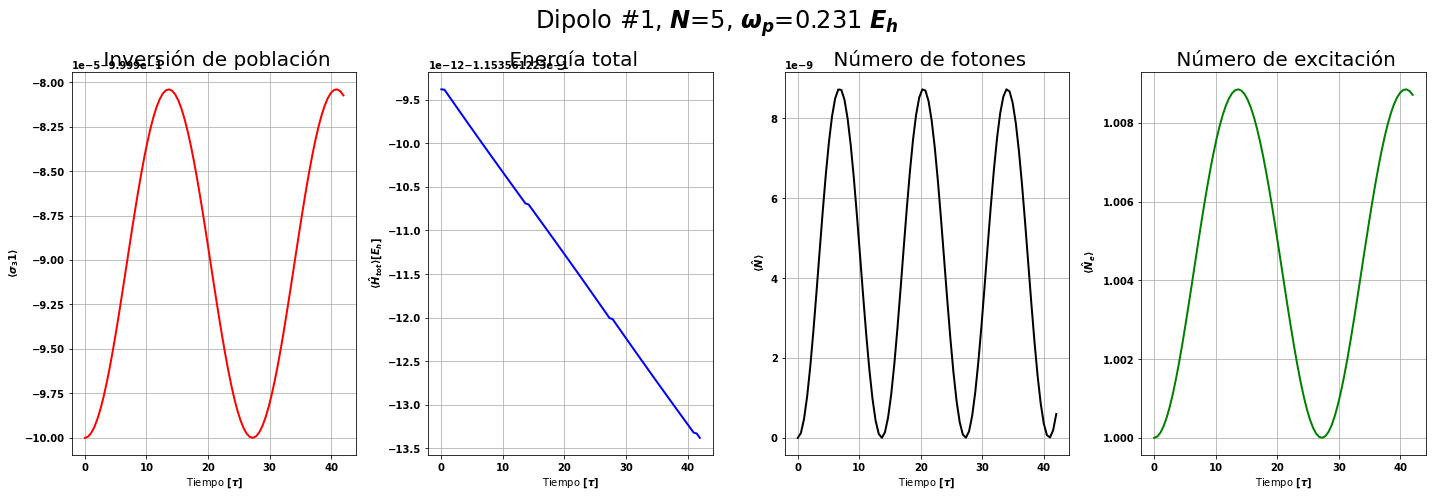

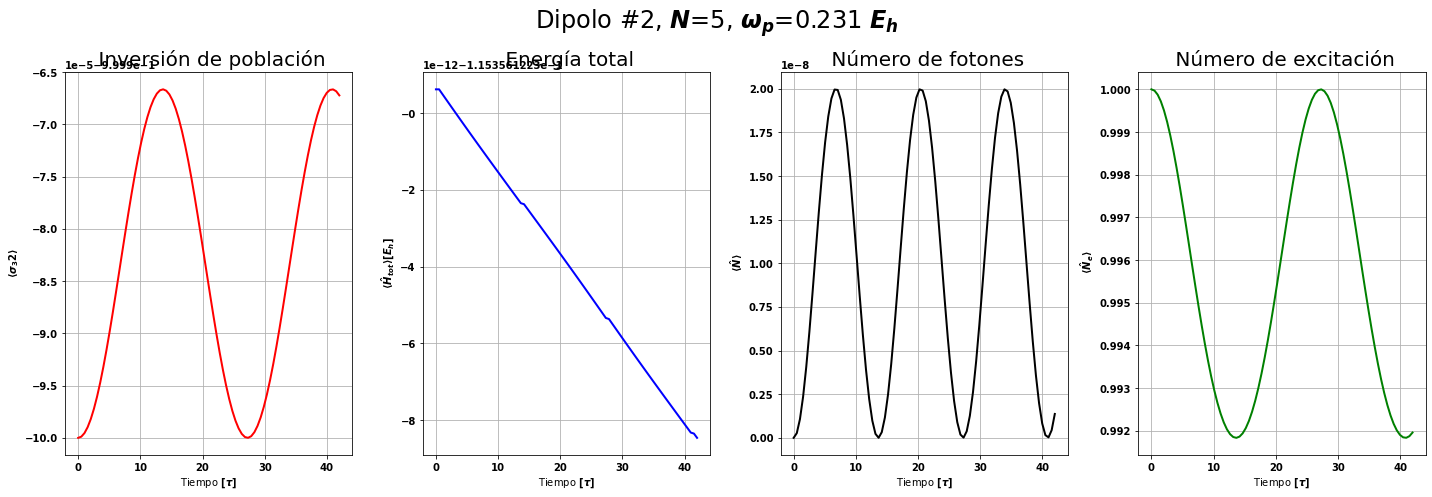

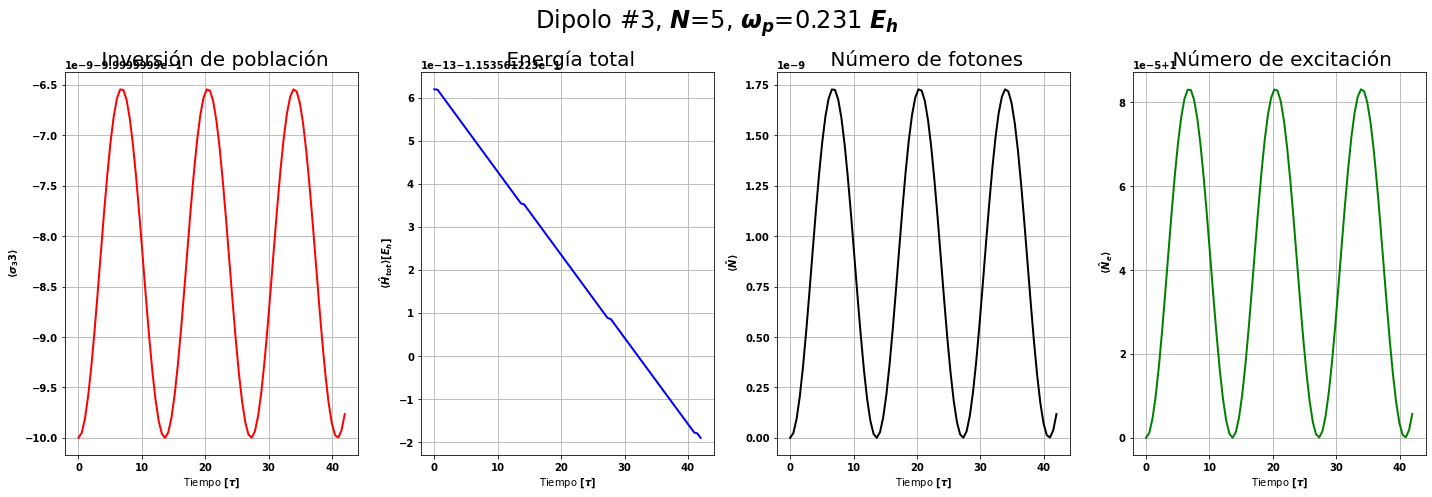

In [130]:
U2=Hrad0(a) #radiación en la cavidad

for i in range(M): #queremos estudiar casa sistema por serado
    
    sp=sigmas[i]
    sm=np.transpose(sp)
    s3=sp@sm-sm@sp
    PP=P[i]
    momento=momentos[i]
    
    n=np.transpose(a)@a
    N_e=n+B[N]@np.transpose(B[N])

    #el hamiltoniano de cada subsistema consistiría en quitar la sumatoria, todos parten del mismo estado. 
    

    U0=Hdip0_(sp) #solo dipolos
    U1=HdipI_(i, M, sigmas, momentos, u, p) #energía de interacción entre dipolos
    U3=HradI_(i, momento, sp, PP,a)[0] #interacción radiación dipolos
    U4=U0+U1+U2+U3



    result=mesolve( Qobj(U4), Qobj(psi0), t, [], [Qobj(s3), Qobj(U4), Qobj(n), Qobj(N_e) ]  )

    
    fig, ax=plt.subplots(1,4, figsize=(20,7))
    
    fig.suptitle(r"Dipolo #{}, $N$={}, $\omega_p$={} $E_h$".format(i+1, N, np.round(omega_p,3)), fontsize=24)

    ax[0].plot(t, result.expect[0], label=r"$\langle \sigma_3{} \rangle$".format(i+1),c='r',lw=2)
    ax[0].set_title(" Inversión de población", fontsize=20)
    ax[0].set_xlabel(r"Tiempo $[\tau]$")
    ax[0].set_ylabel(r" $\langle \sigma_3{} \rangle$".format(i+1))
    ax[0].grid()
    plt.tight_layout()



    ax[1].plot(t, result.expect[1], label=r"$\langle \hat{H}_{tot} \rangle$",c='b',lw=2)
    ax[1].set_title(" Energía total", fontsize=20)
    ax[1].set_xlabel(r"Tiempo $[\tau]$")
    ax[1].set_ylabel(r" $\langle \hat{H}_{tot} \rangle [E_h]$")
    ax[1].grid()
    plt.tight_layout()

    ax[2].plot(t, result.expect[2], label=r"$\langle \hat{a}^\dagger \hat{a} \rangle$",c='k',lw=2)
    ax[2].set_title(" Número de fotones", fontsize=20)
    ax[2].set_xlabel(r"Tiempo $[\tau]$")
    ax[2].set_ylabel(r" $\langle \hat{N} \rangle$")
    ax[2].grid()
    plt.tight_layout()


    ax[3].plot(t, result.expect[3], label=r"$\langle \hat{N}_e \rangle$",c='g',lw=2)
    ax[3].set_title(" Número de excitación", fontsize=20)
    ax[3].set_xlabel(r"Tiempo $[\tau]$")
    ax[3].set_ylabel(r" $\langle \hat{N}_e \rangle$")
    ax[3].grid()
    plt.tight_layout()

    plt.show()
                